# NLP Sentiment Analysis

The aiming of this analysis is to develop a tool to detect racist or sexist speech in tweets. 

As a simple approach, this detection is done on a tweet that contains hate speech in it, related to racist or sexist sentiment associated.

Hence, the work is to clearly classify and predict racist or sexist tweets from other tweets.

## Dataset
The dataset of tweets was split in the ratio of 65:35 into training and testing data. Out of the testing data, 30% is public and the rest is private.

**train.csv** - For training the models, it is provided a labelled dataset of 31,962 tweets in the form of a csv file with each line storing a tweet id, its label and the tweet.

**test_tweets.csv** - It contains the test data file with only tweet ids and the tweet text with each tweet in a new line.

## Importing the libraries

In [0]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Importing the datasets

In [0]:
train  = pd.read_csv('train_tweets.csv')
test = pd.read_csv('test_tweets.csv')

## Inspecting the datasets

In [366]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [367]:
train.describe

<bound method NDFrame.describe of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [368]:
train.count

<bound method DataFrame.count of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [369]:
print("Number of rows:", train.shape[0])

Number of rows: 31962


In [370]:
print("Number of colums:",train.shape[1])

Number of colums: 3


In [371]:
test.describe

<bound method NDFrame.describe of           id                                              tweet
0      31963  #studiolife #aislife #requires #passion #dedic...
1      31964   @user #white #supremacists want everyone to s...
2      31965  safe ways to heal your #acne!!    #altwaystohe...
3      31966  is the hp and the cursed child book up for res...
4      31967    3rd #bihday to my amazing, hilarious #nephew...
...      ...                                                ...
17192  49155  thought factory: left-right polarisation! #tru...
17193  49156  feeling like a mermaid ð #hairflip #neverre...
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...
17195  49158  happy, at work conference: right mindset leads...
17196  49159  my   song "so glad" free download!  #shoegaze ...

[17197 rows x 2 columns]>

## Cleaning the dataset

In [372]:
combi = train.append(test, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [0]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [0]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [0]:
 # Removing Short Words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [377]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


# Tokenization

In [378]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

## Lemmatizing

In [379]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # lemmatizing
tokenized_tweet.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [when, father, dysfunctional, selfish, drag, k...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [0]:
# from nltk.stem.porter import *
# stemmer = PorterStemmer()

# tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
# tokenized_tweet.head()

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

## Visualization and Story Generation

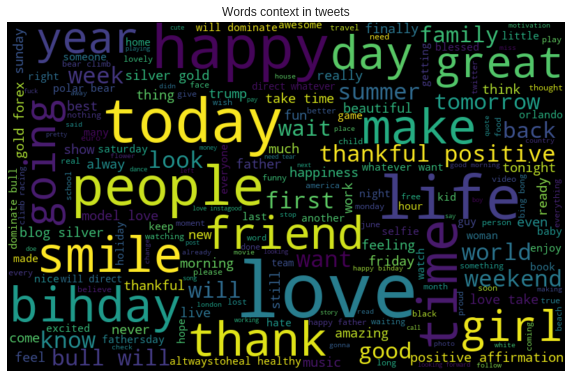

In [382]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words context in tweets')
plt.axis('off')
plt.show()

In [383]:
combi['label'].count

<bound method Series.count of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49154    NaN
49155    NaN
49156    NaN
49157    NaN
49158    NaN
Name: label, Length: 49159, dtype: float64>

In [384]:
print('Total number of classified Tweets (0 or 1):', combi['label'].count())

Total number of classified Tweets (0 or 1): 31962


In [385]:
print('Total number of not classified Tweets (NaN):', combi['label'].isna().sum())

Total number of not classified Tweets (NaN): 17197


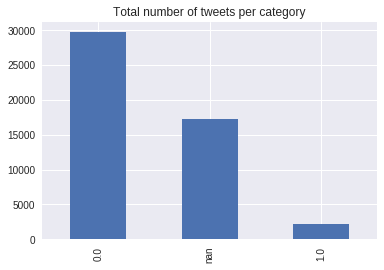

In [386]:
counts = combi['label'].value_counts(dropna=False)
counts.plot.bar(title = "Total number of tweets per category", grid=True)

Distribution of the classified Tweets

In [387]:
combi['label'].value_counts()

0.0    29720
1.0     2242
Name: label, dtype: int64

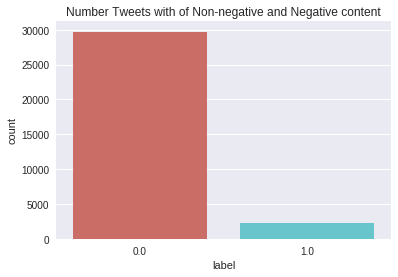

<Figure size 432x288 with 0 Axes>

In [388]:
sns.countplot(x='label', data=combi, palette='hls')
plt.title("Number Tweets with of Non-negative and Negative content")
plt.show()
plt.savefig('count_plot')

Taking into account the labels with 0 and 1 (not including the NaNs)

In [389]:
count_non_negative = len(combi[combi['label']==0])
#print("Number of non negative tweets is:", count_non_negative)
count_negative = len(combi[combi['label']==1])
#print("Number of negative tweets is:", count_negative)
pct_of_non_negative = count_non_negative/(count_non_negative+count_negative)
print("Percentage of non negative tweets is:", round(pct_of_non_negative*100,2),"% (", count_non_negative,")")
pct_of_negative = count_negative/(count_non_negative+count_negative)
print("Percentage of negative tweets is:", round(pct_of_negative*100,2),"% (", count_negative,")")

Percentage of non negative tweets is: 92.99 % ( 29720 )
Percentage of negative tweets is: 7.01 % ( 2242 )


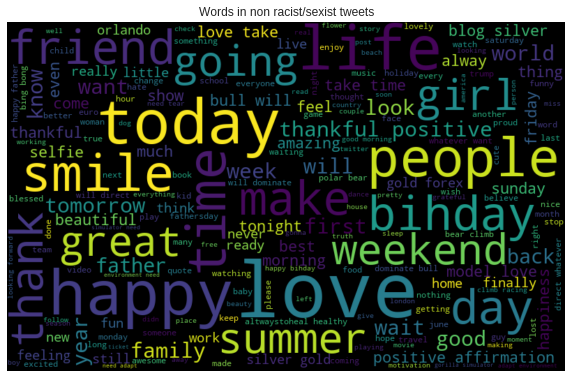

In [390]:
# Words in non racist/sexist tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in non racist/sexist tweets')
plt.axis('off')
plt.show()

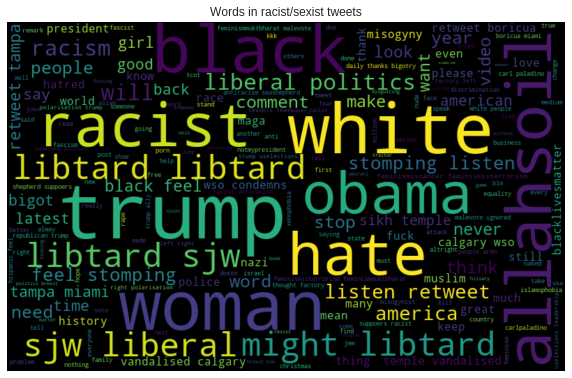

In [391]:
# Words in racist/sexist tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in racist/sexist tweets')
plt.axis('off')
plt.show()

# Hashtags on tweets sentiment impact

In [0]:
# Function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# Extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

In [0]:
# Extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

In [0]:
# Unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

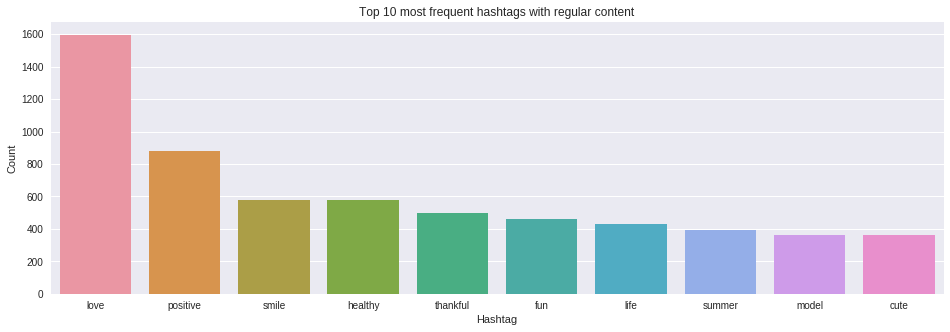

In [396]:
# Selecting top 10 most frequent hashtags
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Top 10 most frequent hashtags with regular content")
plt.show()

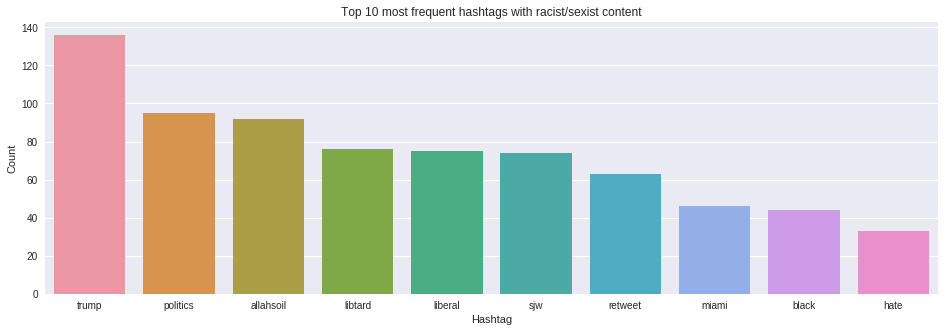

In [397]:
# Selecting top 10 most frequent hashtags
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Top 10 most frequent hashtags with racist/sexist content")
plt.show()

## Feature extraction (Cleaned Tweets)

In [0]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [0]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

## Model building

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [423]:
# Building model using TF-IDF features
train_bow = bow[:train.shape[0],:]
test_bow = bow[train.shape[0]:,:]

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(X_train, y_train) # training the model

prediction = lreg.predict_proba(X_test) # predicting on the validation set

prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0

prediction_int = prediction_int.astype(np.int)

f1 = f1_score(y_test, prediction_int) # calculating f1 score
print("f1-score (Bag Of Words): %.2f" % f1)

f1-score (Bag Of Words): 0.50


In [424]:
# Accuracy of the classifier
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(lreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 94.40%


In [0]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('lreg_model_bow.csv', index=False) # writing data to a CSV file

In [427]:
# Building model using TF-IDF features

train_tfidf = tfidf[:train.shape[0],:]
test_tfidf = tfidf[train.shape[0]:,:]

xtrain_tfidf = train_tfidf[y_train.index]
xvalid_tfidf = train_tfidf[y_test.index]

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)


lreg.fit(X_train, y_train)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1 = f1_score(y_test, prediction_int)
print("f1-score (TF-IDF): {0:.2f}".format(round(f1,2)))

f1-score (TF-IDF): 0.51


In [428]:
# Accuracy of the classifier
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(lreg.score(xvalid_tfidf, y_test)*100))

Accuracy of logistic regression classifier on test set: 94.45%


## Hyperparameters tunning

In [0]:
# Grid Search Cross Validation
# GridSearchCV
def myGSCV(X_train, y_train, hyperparameters):
    from sklearn.model_selection import GridSearchCV

    lreg_model = LogisticRegression()
    clf = GridSearchCV(lreg_model, hyperparameters, cv=10, verbose=0)

    # Fit grid search
    best_model = clf.fit(X_train, y_train)
    return best_model

In [0]:
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [431]:
best_model = myGSCV(X_train,y_train,hyperparameters)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_m

In [432]:
#Training Score
print('Training score: ', round(best_model.best_score_,2)*100,"%")

Training score:  95.0 %


In [433]:
print('Best parameters: ', best_model.best_params_)

Best parameters:  {'C': 2.7825594022071245, 'penalty': 'l2'}


In [434]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


## Final Evaluation

In [435]:
# ROC Curve

from sklearn.metrics import roc_curve,auc

lm = LogisticRegression(solver='lbfgs', max_iter=1000)
best_model.fit(X_train, y_train)
lm.fit(X_test, y_test)

y_pred = best_model.predict_proba(X_test)[:, 1]
fpr_lm, tpr_lm, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_lm, tpr_lm)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_m

## Making predictions

In [436]:
# Making predictions
print('Prediction:', y_pred)

Prediction: [0.00946957 0.01852425 0.04342106 ... 0.01830569 0.05225327 0.01126769]


## Accuracy of the classifier

In [437]:
# Accuracy of the classifier
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(best_model.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 94.55%


In [438]:
prediction = best_model.predict_proba(X_test) # predicting on the validation set

prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1 else 0

prediction_int = prediction_int.astype(np.int)

f1 = f1_score(y_test, prediction_int) # calculating f1 score
print("f1-score (Bag Of Words): %.2f" % f1)

f1-score (Bag Of Words): 0.51


## Plotting the ROC curve

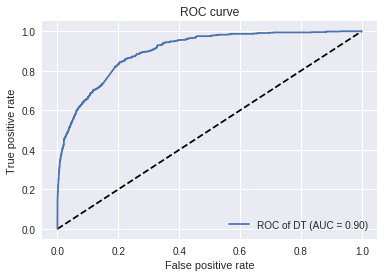

In [439]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lm, tpr_lm, label='ROC of DT (AUC = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Exporting the model

In [0]:
import pickle

# Saving model to disk
pickle.dump(best_model, open('lreg_model.pkl','wb'))


## Testing the exported model

In [441]:
# Loading model to compare the results
model = pickle.load(open('lreg_model.pkl','rb'))

#from sklearn.externals import joblib
# model = joblib.load('dt_model.pkl')
y_pred = model.predict_proba(X_test)[:, 1]

y_pred

array([0.00946957, 0.01852425, 0.04342106, ..., 0.01830569, 0.05225327,
       0.01126769])

In [442]:
print('Prediction:', y_pred)

Prediction: [0.00946957 0.01852425 0.04342106 ... 0.01830569 0.05225327 0.01126769]


In [443]:
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(model.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 94.55%


## Conclusion

### The logistic regression model worked in this kernel, once done the featured engineering and tunned is able to predict the content (sentiment involved) from a regular tweet in opposition to a racist/sexist one and viceversa with an accuracy of 95.0%